In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

## 1. Potassium channel

#### a)

In [2]:
def alpha_n(V):
    return 0.01 * (V + 55) / (1 - np.exp(-0.1 * (V + 55)))

def beta_n(V):
    return 0.125 * np.exp(-0.0125 * (V + 65))

#### b) 

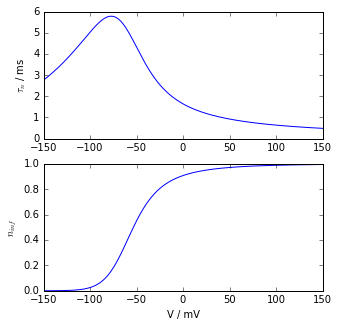

In [3]:
V = np.linspace(-150, 150, 300)
tau_n = 1 / (alpha_n(V) + beta_n(V))
n_inf = alpha_n(V) / (alpha_n(V) + beta_n(V))

plt.figure(figsize=(5, 5))
plt.subplot(211)
plt.plot(V, tau_n)
plt.ylabel(r'$\tau_n$ / ms')

plt.subplot(212)
plt.plot(V, n_inf)
plt.xlabel(r'V / mV')
plt.ylabel(r'$n_{inf}$')

In [4]:
dt = 0.1
t = np.arange(0, 40, dt)
n = np.zeros_like(t)
V = -40
for i in range(len(t)-1):
    n[i+1] = n[i] + dt * (alpha_n(V) * (1 - n[i]) - beta_n(V) * n[i])

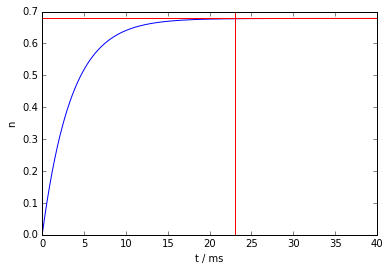

In [5]:
plt.plot(t, n)
plt.xlabel('t / ms')
plt.ylabel('n')
plt.axhline(0.68, color='r')
plt.axvline(23, color='r')

The steady state value for n at V = -40 mV agrees with the values given on the exercise sheets (see red lines in plot above). Therefore, the implementation seems to be correct.

#### c)

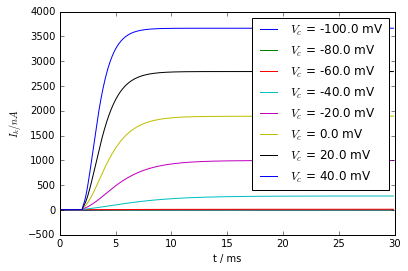

In [6]:
g_k = 36
E_k = -77

dt = 0.1
t = np.arange(0, 30, dt)

n0 = 0.3177

for V_c in np.linspace(-100, 40, 8):
    #print V_c
    n = np.zeros_like(t)
    n[0] = n0
    I_k = np.zeros_like(t)

    for i in range(len(t)-1):
        V = V_c if t[i] >= 2 else -65
        n[i+1] = n[i] + dt * (alpha_n(V) * (1 - n[i]) - beta_n(V) * n[i])
        I_k[i+1] = g_k * n[i+1]**4 * (V - E_k)
        
    plt.plot(t, I_k, label='$V_c$ = {} mV'.format(V_c))
    
plt.legend()
plt.xlabel(r't / ms')
plt.ylabel(r'$I_k / nA$')  # TODO: Is this nA?

As expected, the potassium current activates in response to depolarization and reaches equilibrium after some time. The higher the depolarization, the stronger the current. For hyperpolarization (e.g. $V_c$ = -100 mV), the potassium current stays inactive, which is due to the inactivation of n at small voltages (compare plot of $n_{inf}$ above). As the potassium current is an outward current, it decreases the membrane voltage (e.g. after a spike).

#### d)

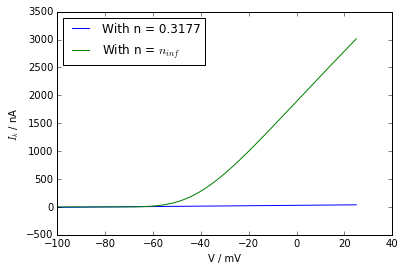

In [7]:
V = np.linspace(-100, 25, 300)
I_k_n0 = g_k * n0**4 * (V - E_k)
n_inf = alpha_n(V) / (alpha_n(V) + beta_n(V))
I_k_n_inf = g_k * n_inf**4 * (V - E_k)

plt.plot(V, I_k_n0, label='With n = {}'.format(n0))
plt.plot(V, I_k_n_inf, label='With n = $n_{inf}$')
plt.xlabel('V / mV')
plt.ylabel(r'$I_k$ / nA')
plt.legend(loc='upper left')

As expected, the potassium current is close to 0 for small voltages, regardless of whether n is at its starting value or has already settled to an equilibrium (i.e. $n_{inf}$). For high voltages, the potassium current is inactive when n is at the starting value, but activates as n settles to equilibrium.

## 2. Sodium ion channel

#### a)

In [8]:
def alpha_m(V):
    return 0.1 * (V + 40) / (1 - np.exp(-0.1 * (V + 40)))

def alpha_h(V):
    return 0.07 * np.exp(-0.05 * (V + 65))

def beta_m(V):
    return 4 * np.exp(-0.0556 * (V + 65))

def beta_h(V):
    return 1 / (1 + np.exp(-0.1 * (V + 35)))

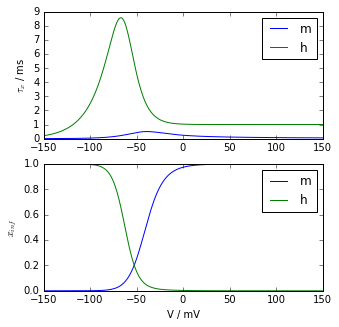

In [9]:
V = np.linspace(-150, 150, 300)
tau_m = 1 / (alpha_m(V) + beta_m(V))
m_inf = alpha_m(V) / (alpha_m(V) + beta_m(V))
tau_h = 1 / (alpha_h(V) + beta_h(V))
h_inf = alpha_h(V) / (alpha_h(V) + beta_h(V))

plt.figure(figsize=(5, 5))
plt.subplot(211)
plt.plot(V, tau_m, label='m')
plt.plot(V, tau_h, label='h')
plt.ylabel(r'$\tau_x$ / ms')
plt.legend()

plt.subplot(212)
plt.plot(V, m_inf, label='m')
plt.plot(V, h_inf, label='h')
plt.xlabel(r'V / mV')
plt.ylabel(r'$x_{inf}$')
plt.legend()

* n: slow, activated by depolarization
* m: fast, activated by depolarization
* h: slow, activated by hyperpolarization

#### b)

In [10]:
g_na = 120
E_na = 50
m0 = 0.0529
h0 = 0.5961

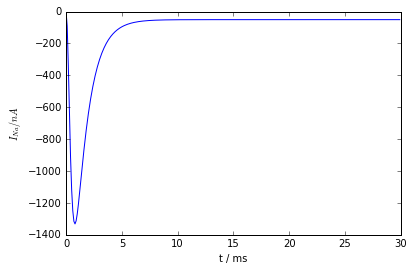

In [11]:
dt = 0.1
t = np.arange(0, 30, dt)

m = np.zeros_like(t)
h = np.zeros_like(t)
I_na = np.zeros_like(t)
m[0] = m0
h[0] = h0

V = -20

for i in range(len(t)-1):
    m[i+1] = m[i] + dt * (alpha_m(V) * (1 - m[i]) - beta_m(V) * m[i])
    h[i+1] = h[i] + dt * (alpha_h(V) * (1 - h[i]) - beta_h(V) * h[i])
    I_na[i+1] = g_na * m[i+1]**3 * h[i+1] * (V - E_na)

plt.plot(t, I_na)

plt.xlabel(r't / ms')
plt.ylabel(r'$I_{Na} / nA$')

The plot looks as described in the exercise text.

#### c)

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: invalid value encountered in double_scalars


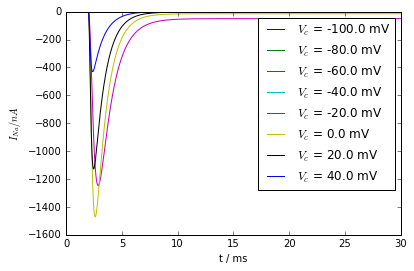

In [12]:
g_na = 120
E_na = 50

dt = 0.01
t = np.arange(0, 30, dt)

for V_c in np.linspace(-100, 40, 8):

    m = np.zeros_like(t)
    h = np.zeros_like(t)
    I_na = np.zeros_like(t)
    m[0] = m0
    h[0] = h0

    for i in range(len(t)-1):
        V = V_c if t[i] >= 2 else -65
        m[i+1] = m[i] + dt * (alpha_m(V) * (1 - m[i]) - beta_m(V) * m[i])
        h[i+1] = h[i] + dt * (alpha_h(V) * (1 - h[i]) - beta_h(V) * h[i])
        I_na[i+1] = g_na * m[i+1]**3 * h[i+1] * (V - E_na)

    plt.plot(t, I_na, label='$V_c$ = {} mV'.format(V_c))
    
plt.legend()
plt.xlabel(r't / ms')
plt.ylabel(r'$I_{Na} / nA$')

The fast activation of m is responsible for the initial peak of the current (following depolarization), the slow activation of h is responsible for the decay of this peak over time.

#### d)

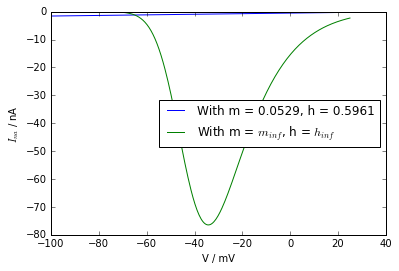

In [13]:
V = np.linspace(-100, 25, 300)
I_na_0 = g_na * m0**3 * h0 * (V - E_na)
m_inf = alpha_m(V) / (alpha_m(V) + beta_m(V))
h_inf = alpha_h(V) / (alpha_h(V) + beta_h(V))
I_na_inf = g_na * m_inf**3 * h_inf * (V - E_na)

plt.plot(V, I_na_0, label='With m = {}, h = {}'.format(m0, h0))
plt.plot(V, I_na_inf, label='With m = $m_{inf}$, h = $h_{inf}$')
plt.xlabel('V / mV')
plt.ylabel(r'$I_{na}$ / nA')
plt.legend(loc='center right')